https://keras.io/layers/recurrent/

In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
import processing
import ds
import ml
import model_saving

/home/octo/anaconda2/envs/carnd-term1/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
filename = '/home/octo/Dropbox'+ '/SPY29Dec.csv'

In [4]:
data=processing.get_csv_pd(filename)
data=processing.BA(data)
data=processing.preprocessing(data)
data_km=ml.kalman_ma(data)
data['km']=data_km

In [5]:
import numpy as np
data['diff']=np.where(np.logical_and(data.Open>data.km,data.spread>0),data.vwap-data.km,np.where(np.logical_and(data.Open<data.km,data.spread<0),data.vwap-data.km,0))

In [7]:
data.head()

,askPrice,askSize,bidPrice,bidSize,Open,Close,High,Low,Volume,vwap,change,liq,spread,vel,return,km,diff
2017-12-29 21:14:58.820995,267.820007,54.0,267.809998,19.0,267.815002,267.815002,267.820007,267.809998,73.0,267.817383,0.0,0.01001,-0.002380,0.01001,0.000037,258.907501,0.0
2017-12-29 21:15:00.302764,267.820007,54.0,267.809998,23.0,267.815002,267.815002,267.820007,267.809998,77.0,267.817017,0.0,0.01001,-0.002014,0.01001,0.000037,261.915995,0.0
2017-12-29 21:15:00.310661,267.820007,49.0,267.809998,23.0,267.815002,267.815002,267.820007,267.809998,72.0,267.816803,0.0,0.01001,-0.001801,0.01001,0.000037,263.438067,0.0
2017-12-29 21:15:00.323921,267.820007,49.0,267.809998,28.0,267.815002,267.815002,267.820007,267.809998,77.0,267.816345,0.0,0.01001,-0.001343,0.01001,0.000037,264.363220,0.0
2017-12-29 21:15:00.332070,267.820007,45.0,267.809998,28.0,267.815002,267.815002,267.820007,267.809998,73.0,267.816162,0.0,0.01001,-0.001160,0.01001,0.000037,264.988846,0.0


In [9]:
dataset=data[['askPrice','askSize','bidPrice','bidSize','Open','Close','High','Low','vwap','km']]

In [10]:
dataset =dataset.astype('float32')

In [11]:
dataset.head()

,askPrice,askSize,bidPrice,bidSize,Open,Close,High,Low,vwap,km
2017-12-29 21:14:58.820995,267.820007,54.0,267.809998,19.0,267.815002,267.815002,267.820007,267.809998,267.817383,258.907501
2017-12-29 21:15:00.302764,267.820007,54.0,267.809998,23.0,267.815002,267.815002,267.820007,267.809998,267.817017,261.915985
2017-12-29 21:15:00.310661,267.820007,49.0,267.809998,23.0,267.815002,267.815002,267.820007,267.809998,267.816803,263.438080
2017-12-29 21:15:00.323921,267.820007,49.0,267.809998,28.0,267.815002,267.815002,267.820007,267.809998,267.816345,264.363220
2017-12-29 21:15:00.332070,267.820007,45.0,267.809998,28.0,267.815002,267.815002,267.820007,267.809998,267.816162,264.988861


In [12]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [13]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [14]:
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

52291 13073


In [16]:
dataset[3:5]

array([[0.97608235, 0.04892966, 0.97608235, 0.02358079, 0.97608235,
        0.97608235, 0.97608235, 0.97608235, 0.97446258, 0.60920281],
       [0.97608235, 0.04485219, 0.97608235, 0.02358079, 0.97608235,
        0.97608235, 0.97608235, 0.97608235, 0.97437537, 0.67906384]])

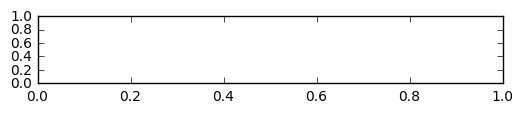

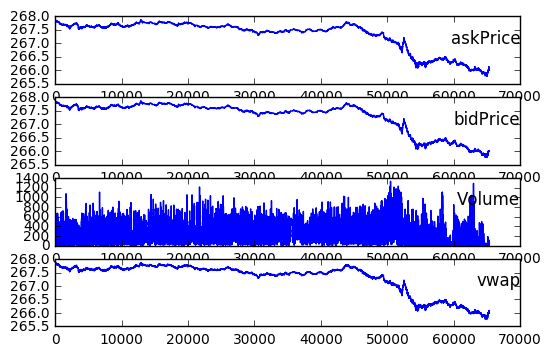

In [20]:
from matplotlib import pyplot
# specify columns to plot
groups = [0,2,8,9]
i = 1
values = data.values
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(data.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

http://colah.github.io/posts/2015-08-Understanding-LSTMs/

http://www.jakob-aungiers.com/articles/a/LSTM-Neural-Network-for-Time-Series-Prediction

https://deeplearning4j.org/lstm